In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-email/spam.csv


#  Import Necessary Libraries

In [2]:
# Importing necessary libraries
import numpy as np        # For numerical operations and Mathematical Equasions 
import pandas as pd       # For data manipulation use it for use data like (csv file, txt file , etc...)
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords


# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data = > stopwords data like (a, the, is, are, etc...)
nltk.download('punkt')       # Downloading tokenizer data = > to split data like 'Hello I'm momen' to ['hello', 'I'm', 'Momen']

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv("/kaggle/input/spam-email/spam.csv", encoding = 'latin1')
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
df.info # make some informtion for this data

<bound method DataFrame.info of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham              Will Ã¼ b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [5]:
# Rename the columns name
df.rename(columns = {'Category': 'target', 'Message': 'text'}, inplace = True)
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Convert the target variable**

In [6]:
# import Laber Encoder from Sklearn
from sklearn.preprocessing import LabelEncoder

'''
First: we know the computer not understand string values so we need convert strings to numbers:

target consist 2 categories (ham, spam) so i use LabelEncoder to convert this values to (0 & 1)

fit_transform: 

'''

encoder = LabelEncoder() # Make a variabele to enharit this function 
df['target'] = encoder.fit_transform(df['target'])
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**Check Missing values**

In [7]:
#checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

**Check Duplicate values**

In [8]:

df.duplicated().sum()

415

**Remove Duplicate values**

In [9]:
df = df.drop_duplicates(keep = 'first')

In [10]:
df.shape

(5157, 2)

# Exploratory data analysis (EDA) 

**Percentage of Ham and Spam**

In [11]:
values = df['target'].value_counts() # we need know summetion of hams(0) and spams(1)
total = values.sum()

percentage_0 = (values[0] /total) * 100 # i need store 
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 87.5702928058949
percentage of 1 : 12.429707194105099


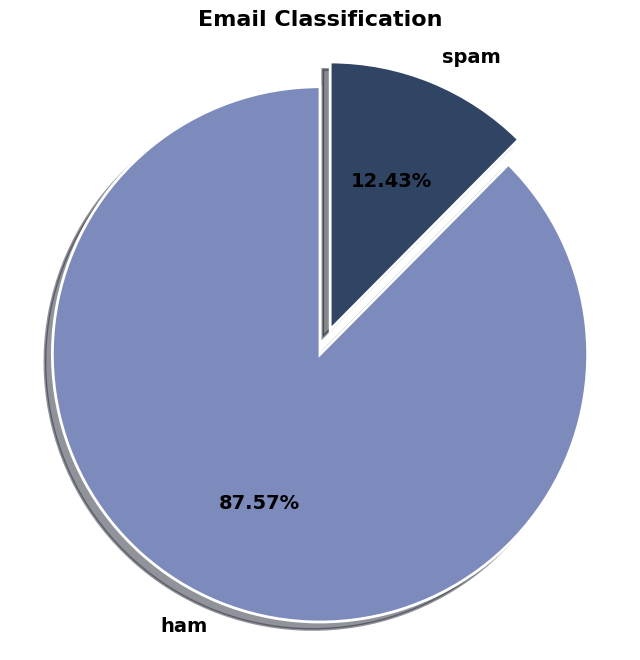

In [12]:
import matplotlib.pyplot as plt

# Define custom colors
colors = ['#7D8ABC', '#304463'] # color uses in matblotlip or another way you can learn in : 000000 -> black, FFFFFF -> white

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

**Text Length and Structure Analysis**

In [13]:
df['num_characters'] = df['text'].apply(len) # we need now to know numbers of characters using len function

# we need now to apply this function lambda x: len(nltk.word_tokenize(x))
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x))) 
'''
lambda x: len(nltk.word_tokenize(x))

lambda x:

nltk.word_tokenize(x):
like: hello i'm momen walied -> after make tokenization nltk.word_tokenize(x) -> ['hello', 'i'm', 'momen' 'walied'] after make len -> 4

'''


df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
'''
the same idea but it's to make tokenization for each sentence 
'''

/tmp/ipykernel_18/170354973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len) # we need now to know numbers of characters using len function
/tmp/ipykernel_18/170354973.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
/tmp/ipykernel_18/170354973.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

"\nthe same idea but it's to make tokenization for each sentence \n"

In [14]:
test_name = 'hello my name is momen'
nltk.word_tokenize(test_name)

['hello', 'my', 'name', 'is', 'momen']

In [15]:
df.head(5)

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [16]:
df[['num_characters', 'num_words', 'num_sentence']].describe() # make some information 

,num_characters,num_words,num_sentence
count,5157.000000,5157.000000,5157.000000
mean,79.228040,18.375024,1.965290
std,58.451149,13.302769,1.439549
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


**Summary Statistics for Legitimate Messages**

In [17]:
#ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.951063,17.084367,1.822852
std,56.730031,13.481827,1.374848
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


**Summary Statistics for Spam Messages**

In [18]:
#spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,641.000000,641.000000,641.000000
mean,137.541342,27.468019,2.968799
std,30.516111,6.988561,1.486069
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


**Coorelation**

In [19]:
df[['target','num_characters', 'num_words', 'num_sentence']].corr()

,target,num_characters,num_words,num_sentence
target,1.000000,0.375897,0.257548,0.262657
num_characters,0.375897,1.000000,0.965547,0.624152
num_words,0.257548,0.965547,1.000000,0.682853
num_sentence,0.262657,0.624152,0.682853,1.000000


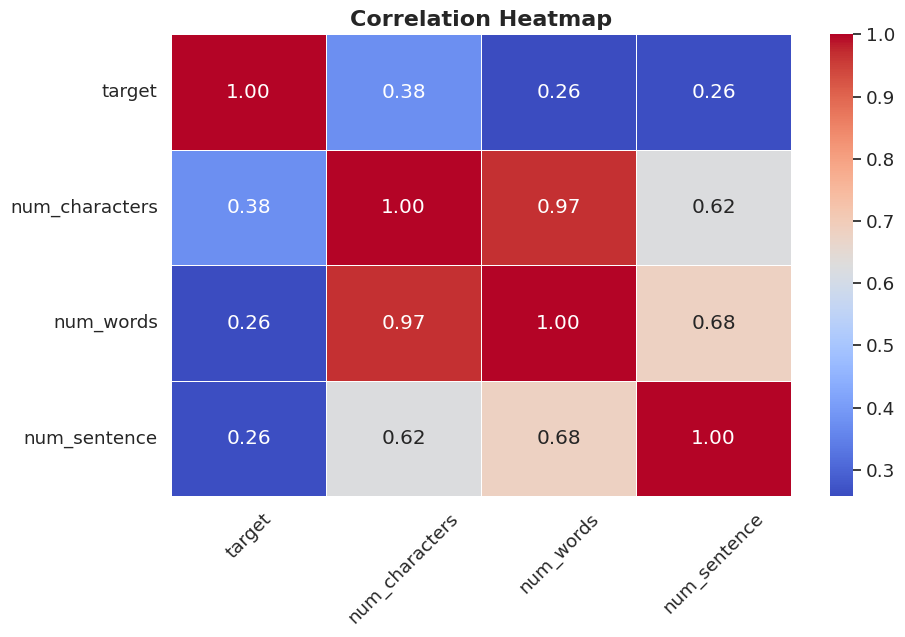

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the correlation matrix
correlation_matrix = df[['target', 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()

# Data Preprocessing

In [21]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer 
# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower() # make all text lower case
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text) # make word tokenization
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum(): 
            y.append(i) 
            
    # Removing stop words and punctuation
    text = y[:] # create a variable and store all text in list
    y.clear() # cleare list to reduse memory complexty 
    
    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: # stopwords like:  “a,” “the,” “is,” “are,” etc.
            y.append(i) 
        
    # Stemming using Porter Stemmer
    
    text = y[:]
    y.clear() # cleare again
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y) # ''.join(y): like -> ['i', 'love', 'pyton'] -> i love python

In [22]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')


'go jurong point avail bugi n great world la e buffet cine got amor wat'

**Creating a New Column: 'transformed_text'**

In [23]:
df['transformed_text'] = df['text'].apply(transform_text) 

/tmp/ipykernel_18/3907598510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


**Word Cloud for Spam Messages**

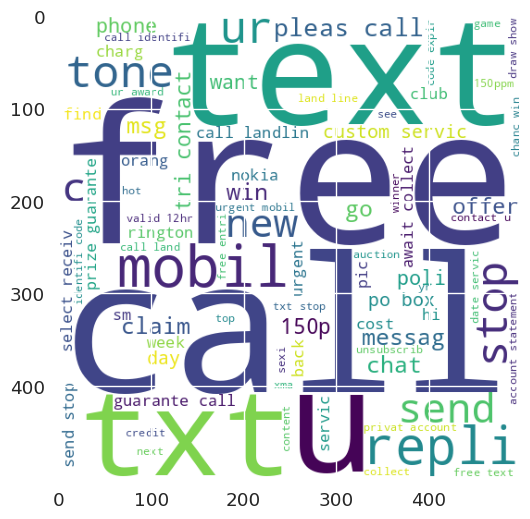

In [24]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

**Word Cloud for Not spam Messages**

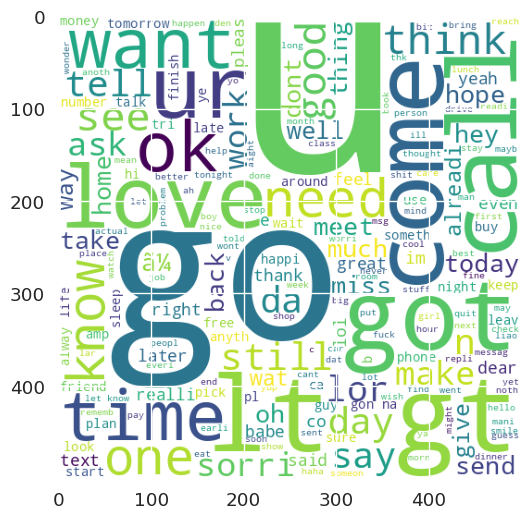

In [25]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

# Model Building

In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

**Dependent and Independent Variable**

In [27]:
X = tfid.fit_transform(df['transformed_text']).toarray() 
y = df['target'].values

**Split into Train and Test Data**

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

**Import the Models**

In [29]:
# SVC -> support vector classefire use to make classification based on features
from sklearn.svm import SVC

# We use the parameter sigmoid as an activation function
# uses for making prediction binary classification 0, 1 or yes, no 
svc = SVC(kernel= "sigmoid", gamma  = 1.0)

 **Train the Models**

In [30]:
# accuracy score use to make a deffeantiation between losses to make accuracy
from sklearn.metrics import accuracy_score
model = svc.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [31]:
print(f'the accuracy is: {accuracy}')

the accuracy is: 0.9767441860465116
